# Linear Regression


In [1]:
%pylab inline
plt.style.use('ggplot')
plt.rcParams['image.interpolation'] = 'nearest'

Populating the interactive namespace from numpy and matplotlib


$$ f(x) = x^4-4x^3+2 $$

In [2]:
f=lambda x: x**4-4*x**3+2

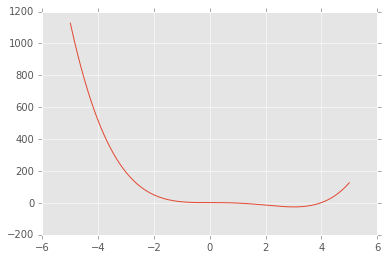

In [3]:
x=np.linspace(-5,5,1000)
y= f(x)
plt.plot(x,y)

### Brute-force Search
Lets do a brute-force search for the given variable in the limit.

In [4]:
minimum=+inf
mx=+inf
import numpy as np

# Your code here
for i in np.linspace(-5,5,1000):
    if f(i)<minimum:
        minimum=f(i)
        mx=i


print("Local minimum occurs at {}".format(mx))

Local minimum occurs at 2.997997997997998


### Gradient Descent

In [5]:
def f_derivative(x):
    # Your code here
    # Calculate the derivative and write your code here
    first=(4*pow(x,3))
    derivative=first+12*pow(x,2)
    return derivative

In [6]:
x_old = 0
x_new = np.random.rand(1,1) 
eps = 0.01 # step size
precision = 0.00001

for i in np.linspace(-5,5):
    x_old=x_new
    x_new=x_old-f_derivative(x_old)*eps
    
# Your code here

print ("Local minimum occurs at", x_new)

Local minimum occurs at [[0.06865368]]


#### Always Check your gradient, before debugging gradient descent,

We know that $$\frac{\partial f}{\partial x}=\frac{f(x+\epsilon)-f(x)}{\epsilon}$$

So always compare the difference between computed gradient using this formula.


#### Lets Check

In [7]:
eps=0.00001
x=1.5
dfx=(f(x+eps)-f(x))/eps
cdfx=f_derivative(x)

print (dfx, cdfx, dfx-cdfx)

-13.500044999936732 40.5 -54.00004499993673


### Let's generate some random data

In [8]:
X = np.arange(0,5,0.1, dtype=np.float32)
delta = np.random.uniform(-1,1, size=X.shape[0])
Y = .4 * X + 3 + delta

#making a copy for later use
rx = X
ry = Y

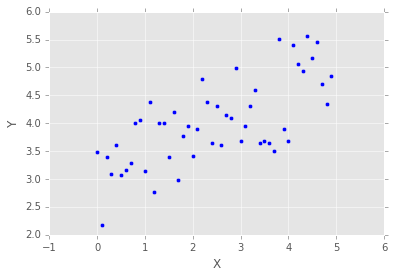

In [9]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')

### Let's visualize our solution space

In [10]:
cf=lambda t0,t1,x,y: np.dot(t1*x+t0-y,t1*x+t0-y)
#square error

In [11]:
t0=arange(-5,+5,0.01)
t1=arange(-5,+5,0.01)

In [12]:
ecf=np.zeros((len(t0),len(t1)))

for i in range(len(t0)):
    for j in range(len(t1)):
        ecf[i,j]=cf(t0[i],t1[j],X,Y)

In [13]:
print (ecf)

[[25617.74831442 25554.52458507 25491.38461943 ...  2727.33303972
   2744.718324    2762.18357383]
 [25596.48711405 25533.28779064 25470.17222677 ...  2730.49872265
   2747.9085046   2765.39826136]
 [25575.2358692  25512.06137941 25448.97051561 ...  2733.67443757
   2751.1087023   2768.62296981]
 ...
 [ 9385.70218061  9346.9052998   9308.19107788 ... 10848.50589093
  10890.31845882 10932.20942103]
 [ 9374.41103238  9335.6386637   9296.94893061 ... 10861.64180164
  10903.47887082 10945.39433284]
 [ 9363.1300556   9324.38223069  9285.71702361 ... 10874.78746345
  10916.64889776 10958.58900251]]


In [14]:
# Generate theta_0 and theta_1 values for the cost function...
tX, tY = np.meshgrid(t0, t1)
print (tX.shape, tY.shape)

(1000, 1000) (1000, 1000)


In [15]:
print (ecf.shape)

(1000, 1000)


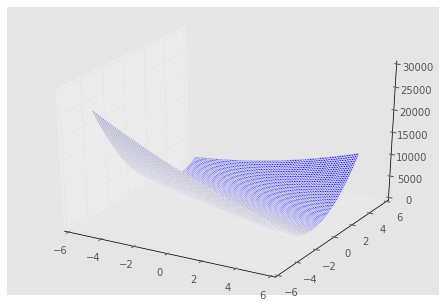

In [16]:
#Plot the cost function...
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(tX,tY,ecf.T)
# ax.set_xlabel(r'$\theta_0$(Intercept)')
# ax.set_ylabel(r'$\theta_1$(Slope)')
# ax.set_zlabel(r'$J(\theta_0,\theta_1)$(Cost Function)')

### Time for our regression implementation

$$
h(X, \theta) = X . \theta
$$

In [17]:
def hyp(theta, X):
    # Your code here
    return np.dot(X,theta)

$$
cost = \frac{1}{2m} \sum_{i = 0}^m{(h(X^i, \theta)-Y^i)}^2
$$

In [18]:
def cost_function(theta,X,Y):
#     x=0
#     cost=0
#     print X.shape[0]
#     for i in range(49):
#         x=hyp(theta,X[i].T)-Y[i]
#         cost+=pow(x,2)
#     print cost
#     cost=cost/(2*X.shape[0])
    # Your code here
    x=np.sum(pow(hyp(theta,X)-Y,2))
    cost=x/(2*X.shape[0])
    return cost

$$
\frac{\delta}{\delta \theta_j} = \frac{1}{m} \sum_{i = 0}^m{(h(X^i, \theta)-Y^i)} * X_j
$$

In [19]:
def derivative_cost_function(theta,X,Y):
    nexamples=float(X.shape[0])
    x=np.dot((hyp(theta,X)-Y),X)
    c=1.0/nexamples
    cost=c*x
    # Your code here
    return cost


In [20]:
print (X.shape)
nx=np.hstack((X,ones(len(X),)))
nx=nx.reshape((2,X.shape[0])).T
print (nx.shape)

(50,)
(50, 2)


In [21]:
np.random.seed(20) # To make sure you have the same value as me
eps=0.0001
nexamples=float(nx.shape[0])
thetas=np.random.rand(nx.shape[1],)
print (thetas)

[0.5881308  0.89771373]


In [22]:
cf=cost_function(thetas,nx,Y)
print (cf)

1.6079576448679713


In [23]:
ad=derivative_cost_function(thetas,nx,Y)
print (ad)

[-3.63358151 -1.67725515]


In [24]:
#Gradient Descent...
def GradientDescent(X,Y,cost_function,derivative_cost_function,maxniter=20000):
    nexamples=float(X.shape[0])
    thetas=rand(X.shape[1],)
    
    
    alpha=0.01
    numiter=0
    theta=0
    # Your code here
    xTrans = X.transpose()
    for i in range(0, 400):
        hypothesis = np.dot(X, theta)
        loss = hypothesis.T - Y
        cost = np.sum(loss ** 2) / (2 * nexamples)
     
        print("Iteration %d | Cost: %f" % (i, cost))
       
        gradient = np.dot(xTrans, loss.T) / nexamples

        theta = theta - alpha * gradient
    return theta

In [25]:
theta_new=GradientDescent(nx,Y,cost_function,derivative_cost_function)

Iteration 0 | Cost: 16.690890
Iteration 1 | Cost: 14.239306
Iteration 2 | Cost: 12.200922
Iteration 3 | Cost: 10.505848
Iteration 4 | Cost: 9.096015
Iteration 5 | Cost: 7.923180
Iteration 6 | Cost: 6.947258
Iteration 7 | Cost: 6.134946
Iteration 8 | Cost: 5.458574
Iteration 9 | Cost: 4.895153
Iteration 10 | Cost: 4.425583
Iteration 11 | Cost: 4.033995
Iteration 12 | Cost: 3.707204
Iteration 13 | Cost: 3.434256
Iteration 14 | Cost: 3.206050
Iteration 15 | Cost: 3.015023
Iteration 16 | Cost: 2.854892
Iteration 17 | Cost: 2.720439
Iteration 18 | Cost: 2.607326
Iteration 19 | Cost: 2.511950
Iteration 20 | Cost: 2.431316
Iteration 21 | Cost: 2.362938
Iteration 22 | Cost: 2.304749
Iteration 23 | Cost: 2.255031
Iteration 24 | Cost: 2.212359
Iteration 25 | Cost: 2.175546
Iteration 26 | Cost: 2.143609
Iteration 27 | Cost: 2.115728
Iteration 28 | Cost: 2.091223
Iteration 29 | Cost: 2.069531
Iteration 30 | Cost: 2.050181
Iteration 31 | Cost: 2.032783
Iteration 32 | Cost: 2.017014
Iteration 33 | C

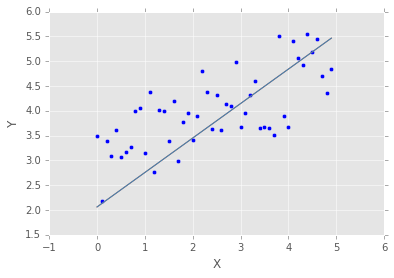

In [26]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(nx[:,0],np.dot(nx,theta_new))